# Speed Dating - Part I

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment.


# Speed Dating - Part II

Let's try to produce our first visualisations with Seaborn. Based on the exploration you realized, try to find relationships between variables. 


# Speed Dating - Part III

Let's finalize our project by adding some interactivity to it. 

👉 Present then your project to your fellow students. 


## Préparation des données

In [1]:
#Import des modules

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette(sns.color_palette("Set2"))
import statsmodels.api as sm

In [2]:
#Chargement du dataset 

dataset = pd.read_csv('datasets/Speed_Dating_Data.csv', encoding='ISO-8859-1')
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#Fonction describe pour un premier aperçu 

display(dataset.describe())
display(dataset.shape)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


(8378, 195)

In [4]:
#Vérification des valeurs nuls 

dataset.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

## Observations démographiques

Après une première exploration des données, nous observons qu'il y a des doublons de données liés aux nombres de vagues et aux réponses des questionnaires (évaluation des rencontres). Par conséquent, il est nécessaire d'effectuer une néttoyage afin d'effectuer une obsersation démographique.

In [5]:
#Nettoyage des proportions 

personnal_data = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']

dataset_demographic = dataset[['iid', 'wave'] + personnal_data].drop_duplicates().copy()
dataset_demographic.head(20)

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,...,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es
0,1,1,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0
10,2,1,0,24.0,law,1.0,NaN,NaN,NaN,2.0,...,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0
20,3,1,0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,...,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN
30,4,1,0,23.0,Law,1.0,NaN,NaN,NaN,2.0,...,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0
40,5,1,0,21.0,Law,1.0,NaN,NaN,NaN,2.0,...,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN
50,6,1,0,23.0,law,1.0,NaN,NaN,NaN,4.0,...,2.0,5.0,6.0,6.0,4.0,1.0,1.0,4.0,3.0,4.0
60,7,1,0,22.0,Law,1.0,NaN,NaN,NaN,4.0,...,8.0,10.0,10.0,10.0,10.0,10.0,10.0,7.0,3.0,2.0
70,8,1,0,25.0,Masters in Public Administration,13.0,NaN,NaN,NaN,2.0,...,10.0,9.0,9.0,6.0,6.0,8.0,6.0,6.0,10.0,NaN
80,9,1,0,26.0,Masters in Public Administration,13.0,NaN,NaN,NaN,6.0,...,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,15.0,1.0
90,10,1,0,26.0,Masters of Social Work&Education,13.0,NaN,NaN,NaN,2.0,...,5.0,6.0,7.0,7.0,8.0,7.0,7.0,7.0,10.0,NaN


Homme [1]    277
Femme [0]    274
Name: gender, dtype: int64

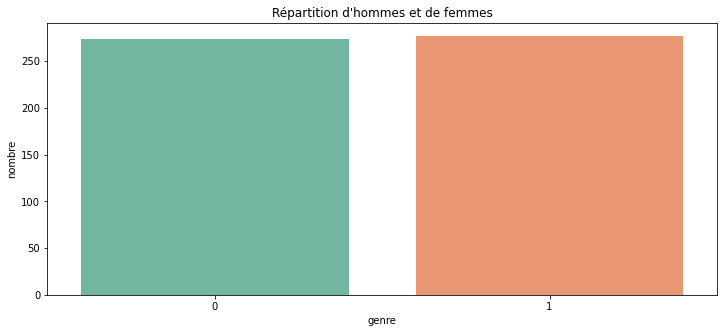

In [6]:
#Nombre d'hommes et de femmes

plt.figure(figsize=(12,5))
sns.countplot(x='gender', data=dataset_demographic).set(title="Répartition d'hommes et de femmes", xlabel='genre', ylabel='nombre')

display(dataset_demographic.gender.map({1 : 'Homme [1]', 0 : 'Femme [0]'}).value_counts(dropna=False))

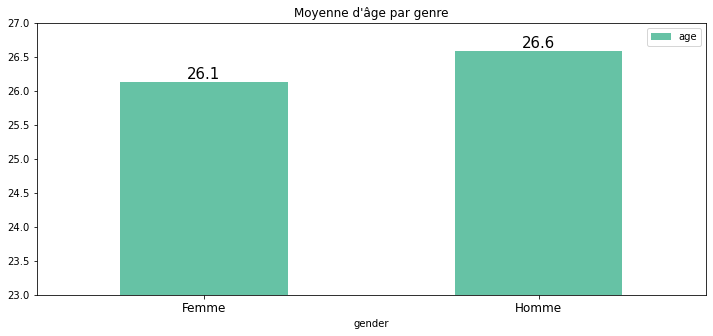

In [7]:
#Moyenne d'âge par genre

ax = dataset_demographic[['gender', 'age']].groupby('gender').mean().plot(kind='bar', figsize=(12,5), title="Moyenne d'âge par genre", ylim=(23,27))
ax.set_xticklabels(['Femme', 'Homme'], fontsize=12, rotation='horizontal')

for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)


Text(0.5, 0.98, 'Âge par genre')

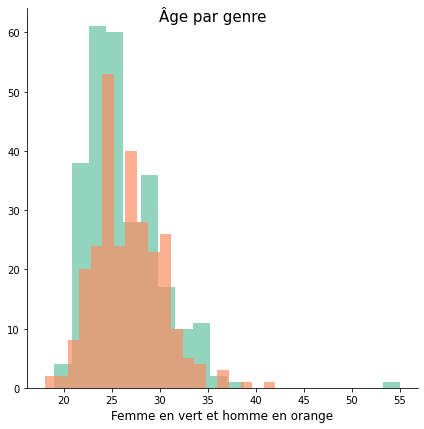

In [8]:
#Aperçu de la distribution par âge et genre

ag = sns.FacetGrid(dataset_demographic, hue='gender', height = 6)
ag.map(plt.hist, 'age', alpha= 0.7, bins=20)
ag.set_xlabels("Femme en vert et homme en orange", fontsize=12)
ag.fig.suptitle('Âge par genre', fontsize=15)


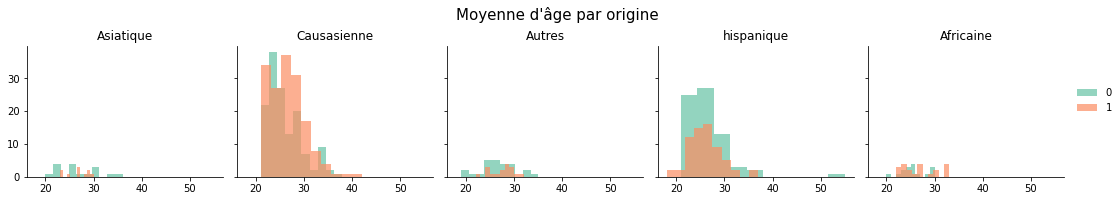

In [9]:
#Moyenne d'âge par origine

g = sns.FacetGrid(dataset_demographic, col='race', hue='gender')
g.map(plt.hist, 'age', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asiatique")
axes[1].set_title("Causasienne")
axes[2].set_title("Autres")
axes[3].set_title("hispanique")
axes[4].set_title("Africaine")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Moyenne d'âge par origine", fontsize=15)

g._legend.set_title('')

In [10]:
#Fréquence de sortie des participants

dataset_demographic['go_out'] = dataset_demographic.go_out.map({1: 'Régulièrement', 2: 'Deux fois par semaine', 3: 'Une fois par semaine',
                             4: 'Deux fois par mois', 5: 'Une fois par mois', 6: 'Occasionnellement',
                             7: 'Preque jamais'}).fillna(dataset_demographic.go_out)

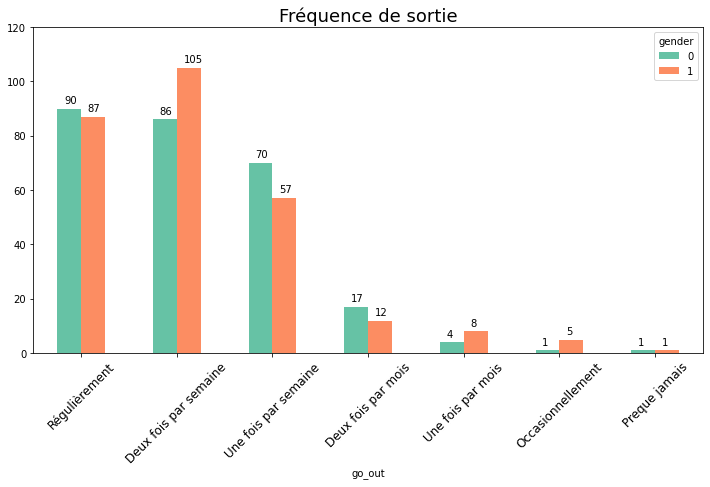

In [11]:
tmp = dataset_demographic[['gender', 'go_out']].groupby(['gender', 'go_out']).size().unstack(0)
tmp = tmp.reindex(['Régulièrement', 'Deux fois par semaine','Une fois par semaine', 'Deux fois par mois','Une fois par mois', 'Occasionnellement', 'Preque jamais'])
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,120))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_title('Fréquence de sortie', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=10)

In [12]:
#Mapping des données démographiques avec le domaine d'étude en FR

dataset_demographic['field_cd'] = dataset_demographic.field_cd.map({1: 'Droit', 2: 'Mathématique', 3: 'Sciences humaines', 4: 'Médecine',
                                 5: 'Anglais.', 6: 'Journalisme', 7: 'Histoire', 8: 'Economie', 9: 'Education',
                                 10: 'Biologie', 11: 'Lettre moderne', 12: 'Autres', 13: 'Science politique',
                                 14: 'Cinéma', 15: 'Arts', 16:'LEA', 17: 'Architecture', 18: 'Autres'}).fillna(dataset_demographic.field_cd)

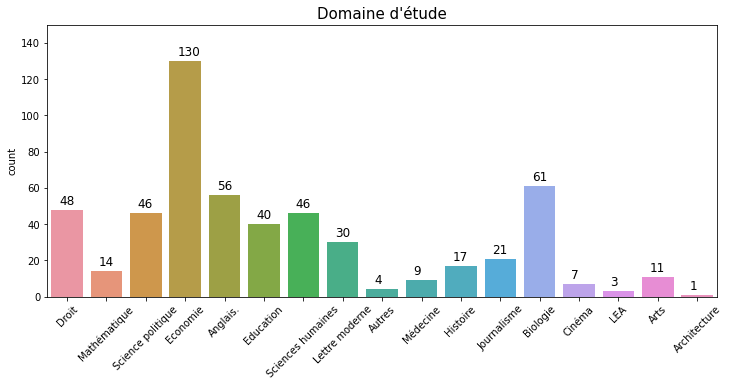

In [13]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x="field_cd", data=dataset_demographic)
plt.title("Domaine d'étude", fontsize=15)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.ylim(0, 150)
plt.xlabel('')

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=12)

Text(0.5, 1.0, 'Art')

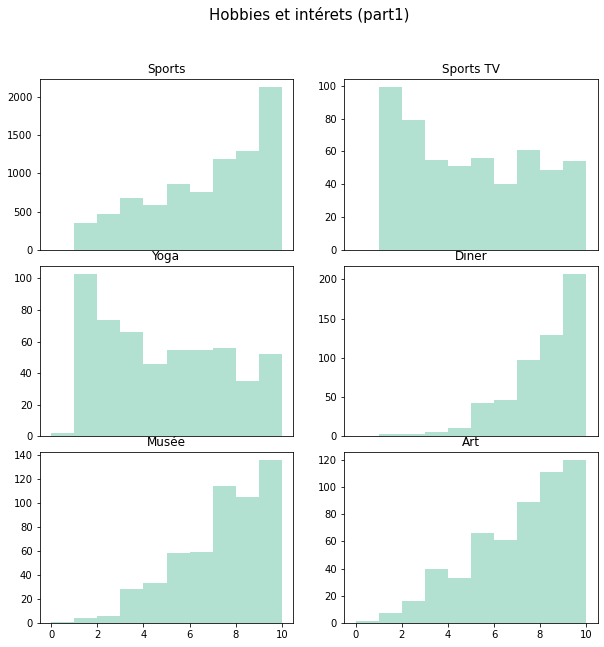

In [14]:
#Hobbies et intérêts

fig = plt.figure(figsize=(10,10))
plt.suptitle("Hobbies et intérets (part1)", fontsize=15)
ax1 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax2 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax3 = plt.subplot2grid((6,2), (2,0), rowspan =2, colspan=1)
ax4 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)
ax5 = plt.subplot2grid((6,2), (4,0), rowspan =2, colspan=1)
ax6 = plt.subplot2grid((6,2), (4,1), rowspan =2, colspan=2)

ax1.hist(dataset['sports'].dropna(), 10,alpha=0.5, range=(0,10))
ax1.set_title("Sports")
ax1.axes.get_xaxis().set_visible(False)

ax2.hist(dataset_demographic['tvsports'].dropna(), 10,alpha=0.5, range=(0,10))
ax2.set_title("Sports TV")
ax2.axes.get_xaxis().set_visible(False)

ax3.hist(dataset_demographic['yoga'].dropna(), 10,alpha=0.5, range=(0,10))
ax3.set_title("Yoga")
ax3.axes.get_xaxis().set_visible(False)

ax4.hist(dataset_demographic['dining'].dropna(), 10,alpha=0.5, range=(0,10))
ax4.set_title("Diner")
ax4.axes.get_xaxis().set_visible(False)

ax5.hist(dataset_demographic['museums'].dropna(), 10,alpha=0.5, range=(0,10))
ax5.set_title("Musée")

ax6.hist(dataset_demographic['art'].dropna(), 10,alpha=0.5, range=(0,10))
ax6.set_title("Art")



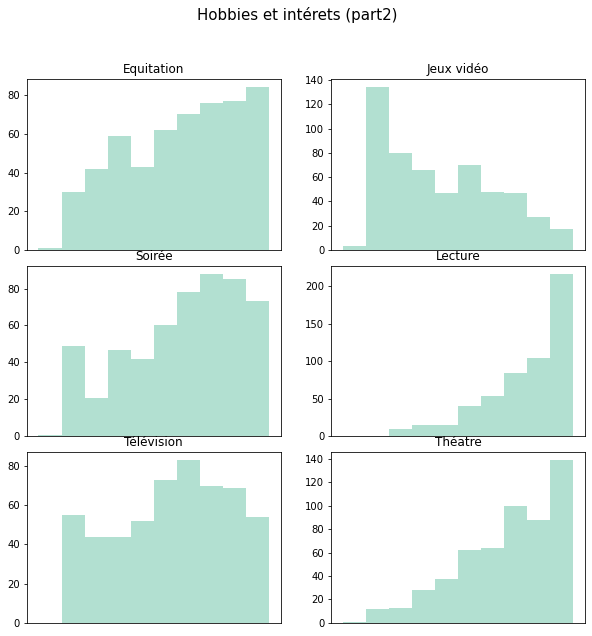

In [15]:
fig = plt.figure(figsize=(10,10))
plt.suptitle("Hobbies et intérets (part2)", fontsize=15)
ax7 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax8 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax9 = plt.subplot2grid((6,2), (2,0), rowspan =2, colspan=1)
ax10 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)
ax11 = plt.subplot2grid((6,2), (4,0), rowspan =2, colspan=1)
ax12 = plt.subplot2grid((6,2), (4,1), rowspan =2, colspan=2)

ax7.hist(dataset_demographic['hiking'].dropna(), 10,alpha=0.5, range=(0,10))
ax7.set_title("Equitation")
ax7.axes.get_xaxis().set_visible(False)

ax8.hist(dataset_demographic['gaming'].dropna(), 10,alpha=0.5, range=(0,10))
ax8.set_title("Jeux vidéo")
ax8.axes.get_xaxis().set_visible(False)

ax9.hist(dataset_demographic['clubbing'].dropna(), 10,alpha=0.5, range=(0,10))
ax9.set_title("Soirée")
ax9.axes.get_xaxis().set_visible(False)

ax10.hist(dataset_demographic['reading'].dropna(), 10,alpha=0.5, range=(0,10))
ax10.set_title("Lecture")
ax10.axes.get_xaxis().set_visible(False)

ax11.hist(dataset_demographic['tv'].dropna(), 10,alpha=0.5, range=(0,10))
ax11.set_title("Télévision")
ax11.axes.get_xaxis().set_visible(False)

ax12.hist(dataset_demographic['theater'].dropna(), 10,alpha=0.5, range=(0,10))
ax12.set_title("Théatre")
ax12.axes.get_xaxis().set_visible(False)

Text(0.5, 1.0, 'Shopping')

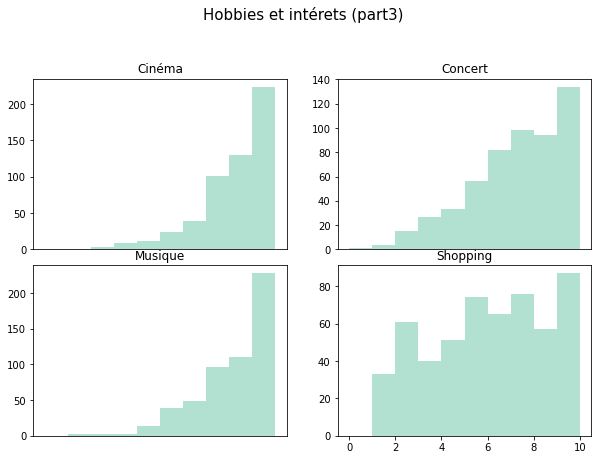

In [16]:
fig = plt.figure(figsize=(10,10))
plt.suptitle("Hobbies et intérets (part3)", fontsize=15)
ax13 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax14 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax15 = plt.subplot2grid((6,2), (2,0), rowspan =2, colspan=1)
ax16 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)

ax13.hist(dataset_demographic['movies'].dropna(), 10,alpha=0.5, range=(0,10))
ax13.set_title("Cinéma")
ax13.axes.get_xaxis().set_visible(False)

ax14.hist(dataset_demographic['concerts'].dropna(), 10,alpha=0.5, range=(0,10))
ax14.set_title("Concert")
ax14.axes.get_xaxis().set_visible(False)

ax15.hist(dataset_demographic['music'].dropna(), 10,alpha=0.5, range=(0,10))
ax15.set_title("Musique")
ax15.axes.get_xaxis().set_visible(False)

ax16.hist(dataset_demographic['shopping'].dropna(), 10,alpha=0.5, range=(0,10))
ax16.set_title("Shopping")


<AxesSubplot:title={'center':'Matrice de corrélation des intérêts'}>

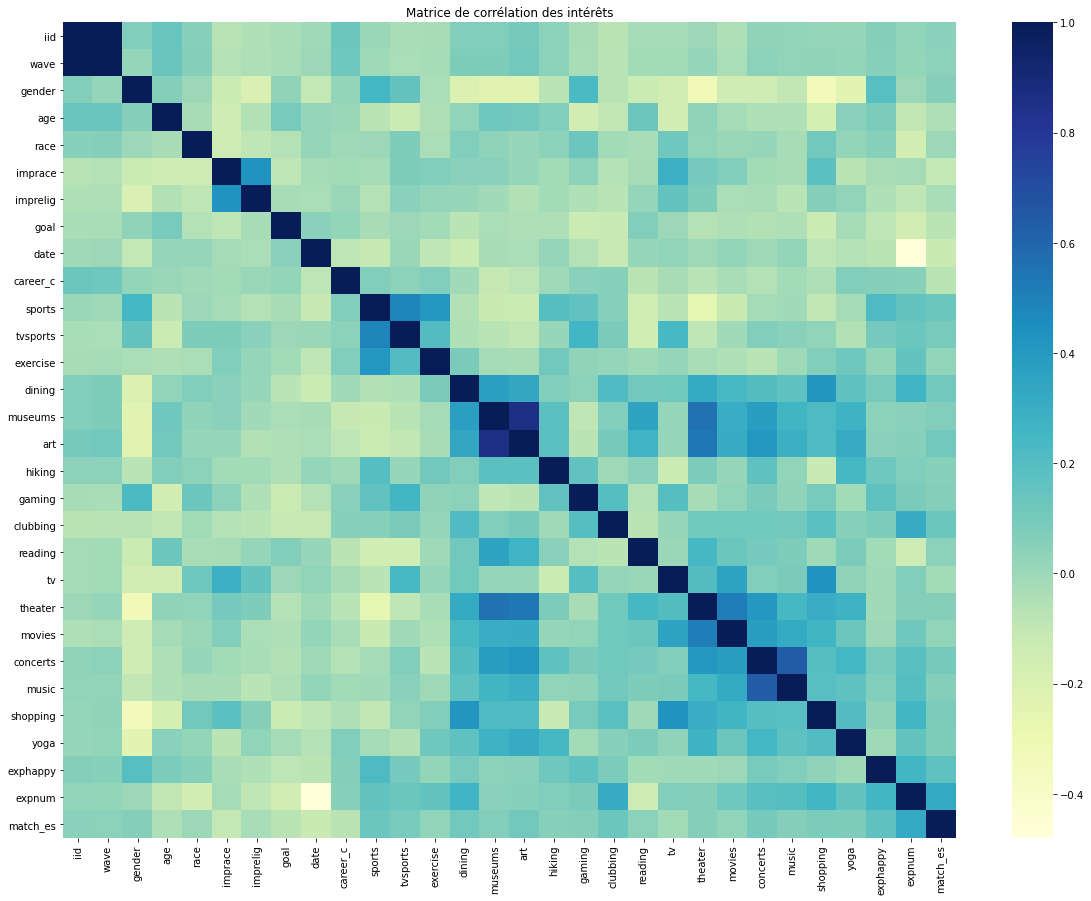

In [17]:
#Matrice de corrélation des intérêts

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Matrice de corrélation des intérêts")
corr = dataset_demographic.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="YlGnBu")

In [18]:
#objectif des participants

dataset_demographic['goal'] = dataset_demographic.goal.map({1: 'Soirée amusante', 2: 'Rencontrer de nouvelles personnes', 3: 'Obtenir un date',
                             4: 'Relation sérieuse', 5: 'Essayer', 6: 'Autres'}).fillna(dataset_demographic.goal)

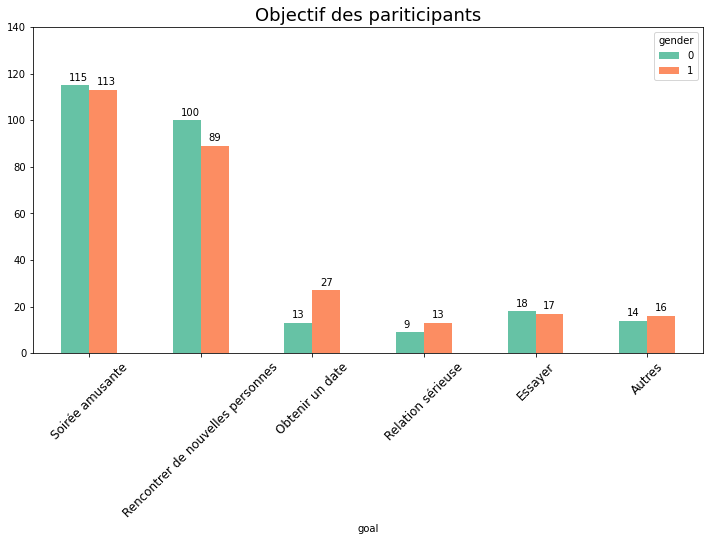

In [19]:
tmp = dataset_demographic[['gender', 'goal']].groupby(['gender', 'goal']).size().unstack(0)
tmp = tmp.reindex(['Soirée amusante', 'Rencontrer de nouvelles personnes', 'Obtenir un date','Relation sérieuse', 'Essayer', 'Autres'])
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,140))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_title('Objectif des pariticipants', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=10)

Démographiquement, nous constatons une certaine parité avec 277 hommes et 274 femmes. Quel que soit le genre, on observe une moyenne d'âge de 26 ans avec une tranche d'âge de 20 - 35 ans. Nous sommes sur une population relativement jeune. Si nous rentrons dans le détail, on constate que dans la distribution de femme, elles sont plus jeune avec une majorité autour des 20 - 27 ans. 

Concernant les origines des individus, nous constatons également une répartition homogène par âge et genre (à l'éxception des origines hispanique dont les femmes sont un peu représentés). Cela permet d'écarter tout ambiguité sur l'origine des participants. 

On constate également que les participants ont une tendance à sortir régulièrement en semaine (90% des participants). 

A l'aide de la matrice de corrélation des intérêts, nous observons des groupes spécfiques d'intérêt : 
- Théatre, Art, Musée, Cinéma, Concert, Musique
- Shopping, TV, Restaurant

Il serait intéressant d'apporter une observation de terrain afin de savoir si ces appétances sont elles une pratique ou une mise en évidence de la personnalité. 

Pour le domaine d'étude, nous observons une prédominance pour les domaines suivants : 
1° Economie 
2° Biologie
3° Anglais
4° Droit
5° Mathématique et Education
Cela relativement interessant de le comparer ces chiffres avec des sources externes. On constate effectivement que l'économie et la biologie sont des domaines plécités par les étudiants américains. De plus les autres domaine sont dans le TOP 10 des domaines. 
(voir source : https://major-prepa.com/langues/systemes-universitaires-royaume-uni-etats-unis/)

La motivation à participer à un speed dating est principalement pour renconter de nouvelles personnes et/ou passer une soirée amusante. On constate qu'entre l'objectif de l'évenement et celui des participants, il y a un réel fossé. Il semblerait que les participants ont une tendance à prendre moins au sérieux l'aspect de rencontre amoureuse dans ce type d'événement. 


Si nous devions résumé en quelques mots. Les participants de ce speed dating sont : 
- Groupe paritaire
- Age moyen de 26 ans 
- Cultivé
- Actif / Fêtard 
- Eduqué 
- Sociabilisé (goal)

## Critères du particiant 

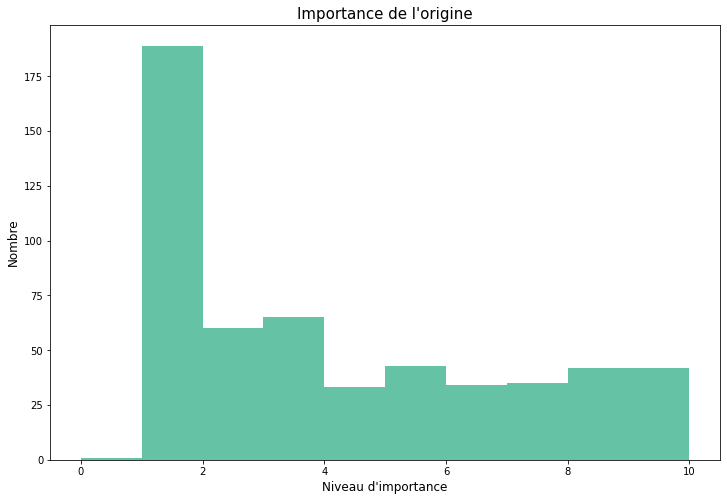

In [20]:
# L'importance de la réligion 

ax = dataset_demographic.imprace.hist(bins=10, figsize=(12,8))
ax.set_title("Importance de l'origine", fontsize=15)
ax.set_xlabel("Niveau d'importance",fontsize=12)
ax.set_ylabel('Nombre', fontsize=12)
ax.grid(False)

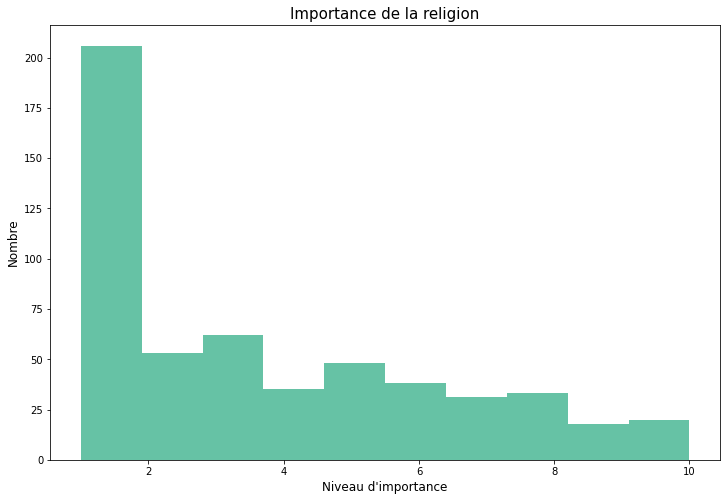

In [21]:
# L'importance de la réligion 

ax = dataset_demographic.imprelig.hist(bins=10, figsize=(12,8))
ax.set_title('Importance de la religion', fontsize=15)
ax.set_xlabel("Niveau d'importance",fontsize=12)
ax.set_ylabel('Nombre', fontsize=12)
ax.grid(False)

Text(0.5, 1.0, 'Point commun')

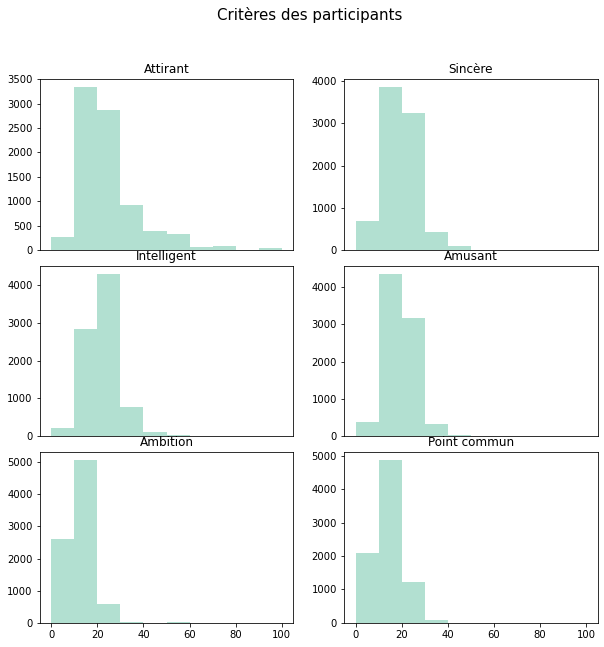

In [22]:
#Critères des participants

fig = plt.figure(figsize=(10,10))
plt.suptitle("Critères des participants", fontsize=15)
ax1 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax2 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax3 = plt.subplot2grid((6,2), (2,0), rowspan =2, colspan=1)
ax4 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)
ax5 = plt.subplot2grid((6,2), (4,0), rowspan =2, colspan=1)
ax6 = plt.subplot2grid((6,2), (4,1), rowspan =2, colspan=2)

ax1.hist(dataset['attr1_1'].dropna(), 10,alpha=0.5, range=(0,100))
ax1.set_title("Attirant")
ax1.axes.get_xaxis().set_visible(False)

ax2.hist(dataset['sinc1_1'].dropna(), 10,alpha=0.5, range=(0,100))
ax2.set_title("Sincère")
ax2.axes.get_xaxis().set_visible(False)

ax3.hist(dataset['intel1_1'].dropna(), 10,alpha=0.5, range=(0,100))
ax3.set_title("Intelligent")
ax3.axes.get_xaxis().set_visible(False)

ax4.hist(dataset['fun1_1'].dropna(), 10,alpha=0.5, range=(0,100))
ax4.set_title("Amusant")
ax4.axes.get_xaxis().set_visible(False)

ax5.hist(dataset['amb1_1'].dropna(), 10,alpha=0.5, range=(0,100))
ax5.set_title("Ambition")

ax6.hist(dataset['shar1_1'].dropna(), 10,alpha=0.5, range=(0,100))
ax6.set_title("Point commun")

Après plusieurs observations, il était difficile d'apporter une analyse sur la distribution critère par critère. Pour faciliter cette EDA, il a été décidé d'utiliser une matrice de corrélation. 

In [23]:
#Découpage des évaluations des participants

you_look = [col for col in dataset.columns if '1_1' in col] # Recherche du participant
other_look =  [col for col in dataset.columns if '4_1' in col] # L'idée de ce que recherche le genre opposé
opp_look = [col for col in dataset.columns if '2_1' in col] # Ce que penses le genre opposé sur le participant
your_score = [col for col in dataset.columns if '3_1' in col] # Evaluation individuelle
they_score = [col for col in dataset.columns if '5_1' in col] # Evaluation par le genre opposé

Text(0.5, 1.0, 'Matrice des critères du participant')

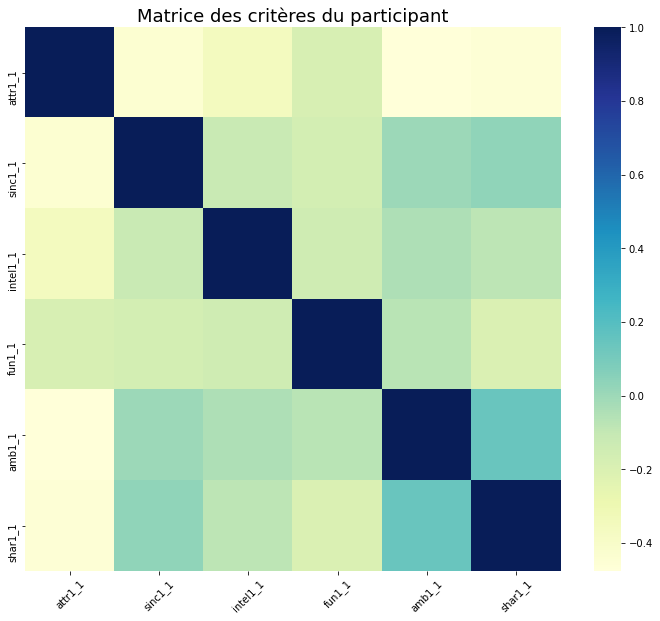

In [24]:
#Matrice des critères du participant

corr = dataset[you_look].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Matrice des critères du participant', fontsize=18)

Afin de corooborer ces valeurs, nous allons dupliquer sur 3 vagues spécifiques : 
- Deuxième vague 
- Onzième vague
- vingt unième vague 

Afin d'observer des corrélations dans le temps. La sélection s'est effectué en prenant en compte le nombre de personne et la temporalité.

In [25]:
#Vague 2
wave1 = dataset[(dataset.wave > 1) & (dataset.wave < 3)].copy()

#Vague 11
wave2 = dataset[(dataset.wave > 10) & (dataset.wave < 12)].copy()

#Vague 21
wave3 = dataset[(dataset.wave > 20)].copy()

Text(0.5, 1.0, 'Correlation between evaluations')

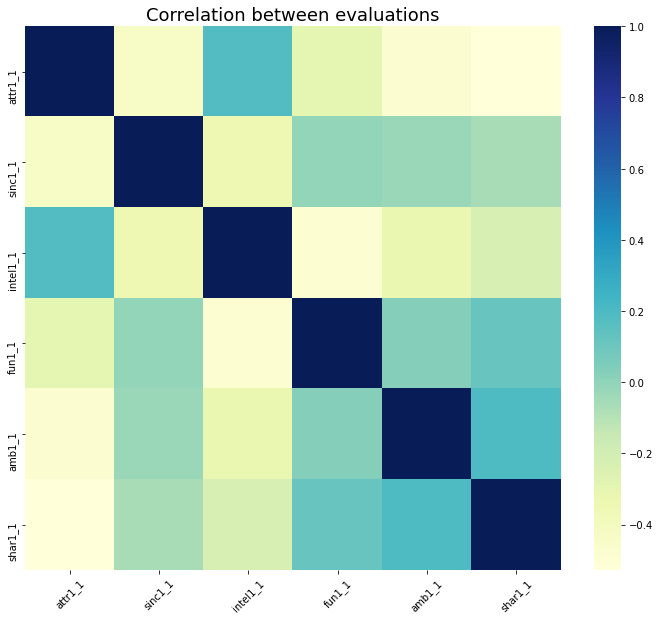

In [26]:
#Matrice de corrélation des intérêts (vague 1)

corr = wave1[you_look].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between evaluations', fontsize=18)

Text(0.5, 1.0, 'Correlation between evaluations')

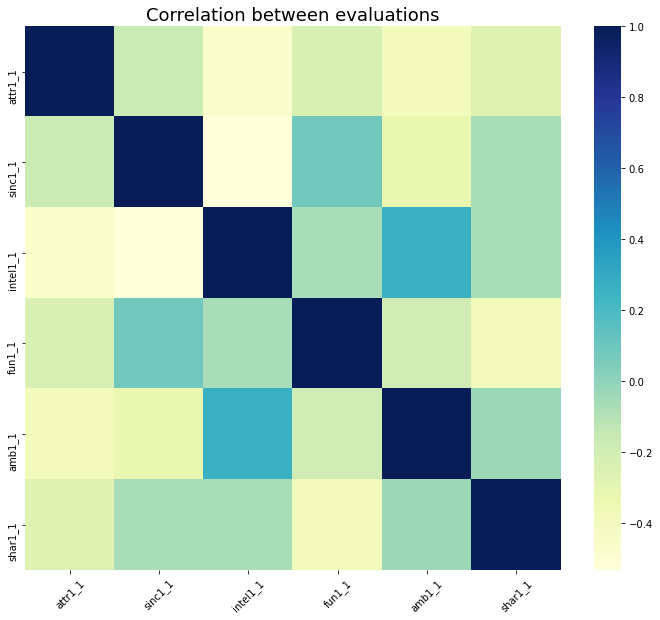

In [27]:
#Matrice de corrélation des intérêts (vague 2)

corr = wave2[you_look].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between evaluations', fontsize=18)

Text(0.5, 1.0, 'Correlation between evaluations')

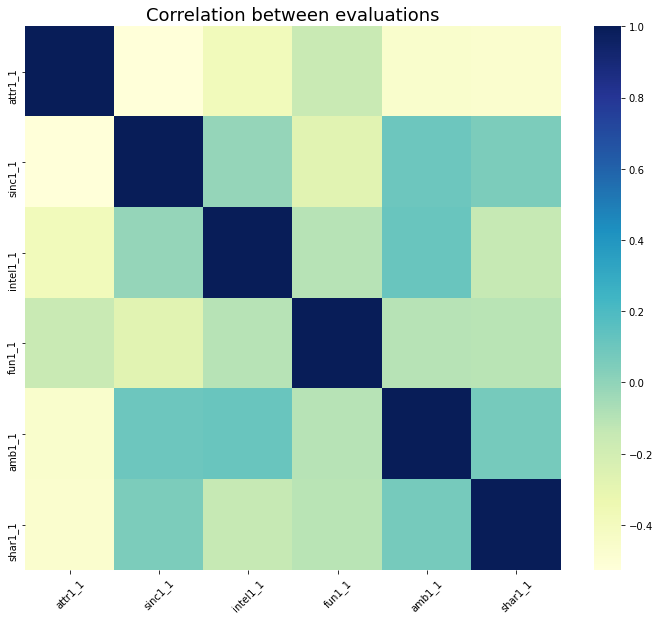

In [28]:
#Matrice de corrélation des intérêts (vague 3)


corr = wave3[you_look].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between evaluations', fontsize=18)

La race et la religion sont des éléments non déterminant dans l'attractivité du sexe opposé. Toutefois, on constate que dans les critères que "Ambitieux, Point commun, Sincère" prédomminent sur l'ensemble de la distribution ou sur des vagues spécifiques. 
Pour comprendre les éléments clés permettant d'avoir un deuxième date, il faudrait analyser les critères en lien avec les personnes rencontrées. 

## Finalités des rencontres

NaN        4404
No [0]     2476
Yes [1]    1498
Name: date_3, dtype: int64

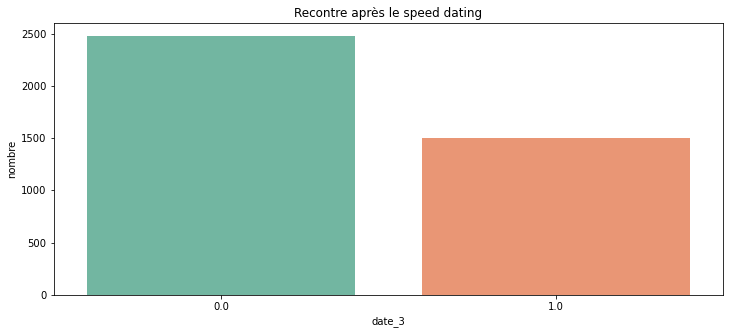

In [29]:
# Nombre de rencontre après le speed dating

plt.figure(figsize=(12,5))
sns.countplot(x='date_3', data=dataset).set(title="Recontre après le speed dating", xlabel='date_3', ylabel='nombre')

display(dataset.date_3.map({1.0 : 'Yes [1]', 0.0 : 'No [0]'}).value_counts(dropna=False))

Text(0.5, 1.0, 'Point commun')

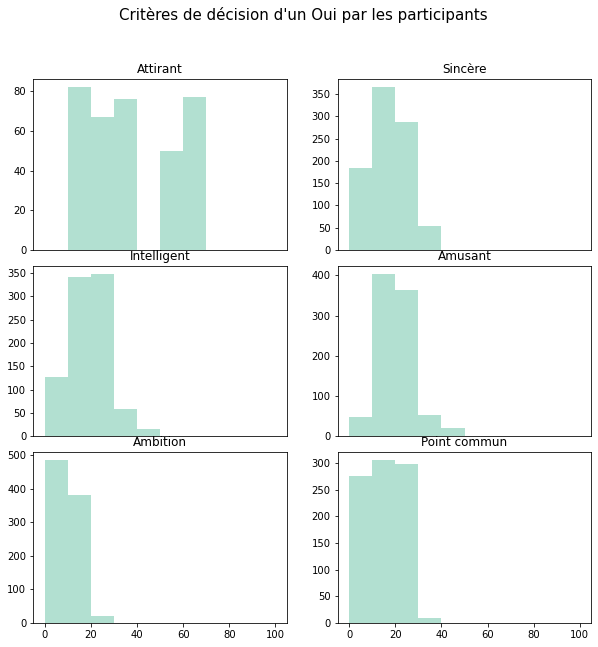

In [30]:
#Critères de décision d'un Oui par les participants

yes_date = dataset[(dataset.date_3 == 1.0)].copy()

fig = plt.figure(figsize=(10,10))
plt.suptitle("Critères de décision d'un Oui par les participants", fontsize=15)
ax1 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax2 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax3 = plt.subplot2grid((6,2), (2,0), rowspan =2, colspan=1)
ax4 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)
ax5 = plt.subplot2grid((6,2), (4,0), rowspan =2, colspan=1)
ax6 = plt.subplot2grid((6,2), (4,1), rowspan =2, colspan=2)

ax1.hist(yes_date['attr7_2'].dropna(), 10,alpha=0.5, range=(0,100))
ax1.set_title("Attirant")
ax1.axes.get_xaxis().set_visible(False)

ax2.hist(yes_date['sinc7_3'].dropna(), 10,alpha=0.5, range=(0,100))
ax2.set_title("Sincère")
ax2.axes.get_xaxis().set_visible(False)

ax3.hist(yes_date['intel7_3'].dropna(), 10,alpha=0.5, range=(0,100))
ax3.set_title("Intelligent")
ax3.axes.get_xaxis().set_visible(False)

ax4.hist(yes_date['fun7_3'].dropna(), 10,alpha=0.5, range=(0,100))
ax4.set_title("Amusant")
ax4.axes.get_xaxis().set_visible(False)

ax5.hist(yes_date['amb7_3'].dropna(), 10,alpha=0.5, range=(0,100))
ax5.set_title("Ambition")

ax6.hist(yes_date['shar7_3'].dropna(), 10,alpha=0.5, range=(0,100))
ax6.set_title("Point commun")

Text(0.5, 1.0, "Matrice de corrélation des critères de décision d'un Oui par les participants")

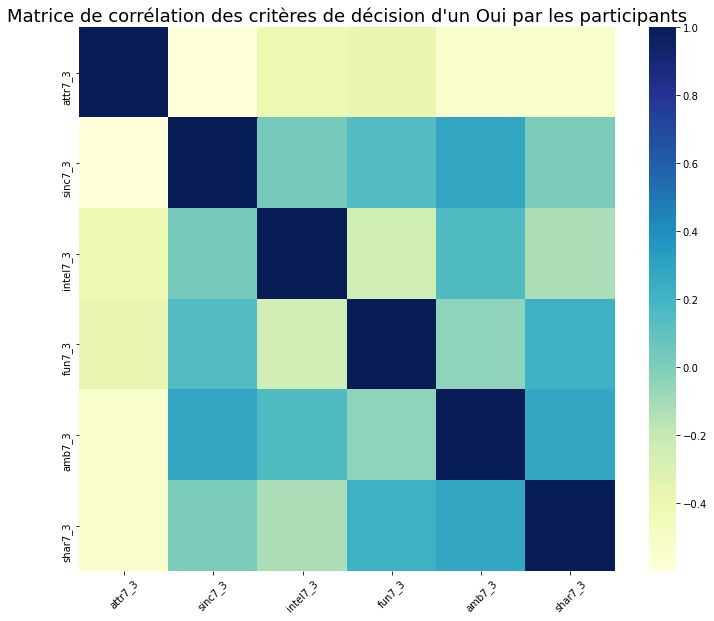

In [31]:
#Matrice de corrélation des critères de décision d'un Oui par les participants

yes_date = dataset[(dataset.date_3 == 1.0)].copy()
decision = [col for col in dataset.columns if '7_3' in col]

corr = yes_date[decision].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Matrice de corrélation des critères de décision d'un Oui par les participants", fontsize=18)

Text(0.5, 1.0, "Matrice de corrélation des critères de décision d'un Non par les participants")

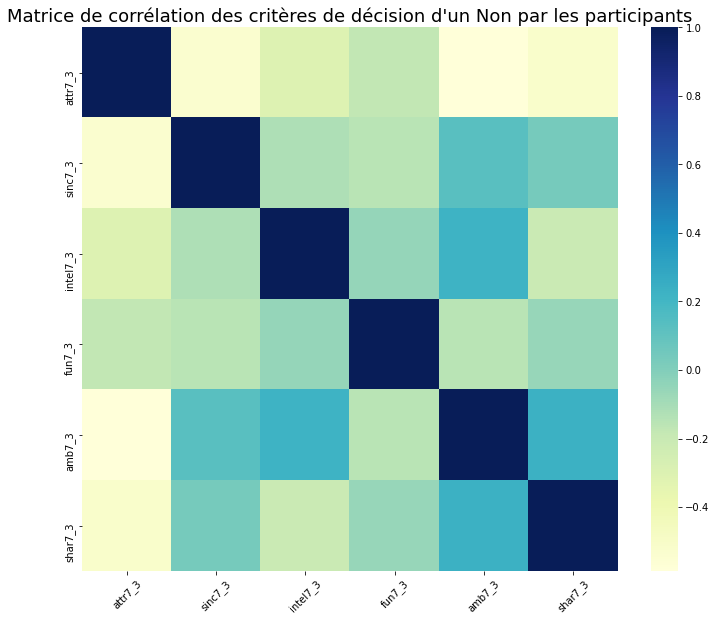

In [32]:
#Matrice de corrélation des critères de décision d'un Non par les participants

no_date = dataset[(dataset.date_3 == 0.0)].copy()
decision = [col for col in dataset.columns if '7_3' in col]

corr = no_date[decision].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Matrice de corrélation des critères de décision d'un Non par les participants", fontsize=18)

## Conclusion

Initiallement, les participants exprimaient que les critères les plus important Ambitieux, Sincère et avoir des points communs. Cependant lorsqu'on regarde les critères effectifs à une rencontre, on constate que l'ambition est remplacé par le "Fun" (ou amusant). Nous conseillerions à un futur participant pour avoir ses chances pour un second date de jouer les cartes suivantes : 
- L'humour 
- La sincérité dans les propos 
- Rechercher les points communs de son participants (écoute de l'autre)

In [33]:
 "Ambitieux, Point commun, Sincère" 

'Ambitieux, Point commun, Sincère'